In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('BNB.csv',sep=";")
df1=df.reset_index()['Price']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 8s 254ms/step - loss: 1.8284e-04 - val_loss: 0.2414
Epoch 2/100
13/13 [==============================] - 2s 157ms/step - loss: 7.8133e-05 - val_loss: 0.0852
Epoch 3/100
13/13 [==============================] - 2s 167ms/step - loss: 2.5816e-05 - val_loss: 0.0195
Epoch 4/100
13/13 [==============================] - 2s 150ms/step - loss: 1.8179e-05 - val_loss: 0.0265
Epoch 5/100
13/13 [==============================] - 2s 154ms/step - loss: 1.6535e-05 - val_loss: 0.0184
Epoch 6/100
13/13 [==============================] - 2s 149ms/step - loss: 1.3808e-05 - val_loss: 0.0183
Epoch 7/100
13/13 [==============================] - 2s 143ms/step - loss: 1.3086e-05 - val_loss: 0.0186
Epoch 8/100
13/13 [==============================] - 2s 145ms/step - loss: 1.2856e-05 - val_loss: 0.0145
Epoch 9/100
13/13 [==============================] - 2s 144ms/step - loss: 1.2861e-05 - val_loss: 0.0179
Epoch 10/100
13/13 [==============================] - 2

13/13 [==============================] - 2s 157ms/step - loss: 4.5558e-06 - val_loss: 0.0140
Epoch 79/100
13/13 [==============================] - 2s 157ms/step - loss: 4.7429e-06 - val_loss: 0.0109
Epoch 80/100
13/13 [==============================] - 2s 148ms/step - loss: 4.5504e-06 - val_loss: 0.0092
Epoch 81/100
13/13 [==============================] - 2s 143ms/step - loss: 4.4195e-06 - val_loss: 0.0092
Epoch 82/100
13/13 [==============================] - 2s 143ms/step - loss: 4.5698e-06 - val_loss: 0.0091
Epoch 83/100
13/13 [==============================] - 2s 144ms/step - loss: 5.9352e-06 - val_loss: 0.0060
Epoch 84/100
13/13 [==============================] - 2s 145ms/step - loss: 5.0190e-06 - val_loss: 0.0105
Epoch 85/100
13/13 [==============================] - 2s 146ms/step - loss: 4.9854e-06 - val_loss: 0.0102
Epoch 86/100
13/13 [==============================] - 2s 155ms/step - loss: 4.9669e-06 - val_loss: 0.0107
Epoch 87/100
13/13 [==============================] - 2s 15

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

9/9 [==============================] - 0s 25ms/step


In [11]:
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval)) * 100
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mae = np.mean(np.abs(y_pred - ytest))
print("Validation MAE:", valid_mae)
print("Testing MAE:", test_mae)

Validation RMSE: 0.057952602952203315
Testing RMSE: 0.20982658479831198
Validation MAPE: 10.66686929161328
Testing MAPE: 26.925663935901184
Validation MAE: 0.0470962566819893
Testing MAE: 0.167648161312008


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

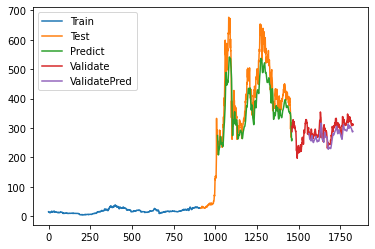

In [13]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
plt.legend(['Train','Test','Predict','Validate','ValidatePred'])
plt.show()